In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


# **Loading the Dataset**

In [2]:
df=pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

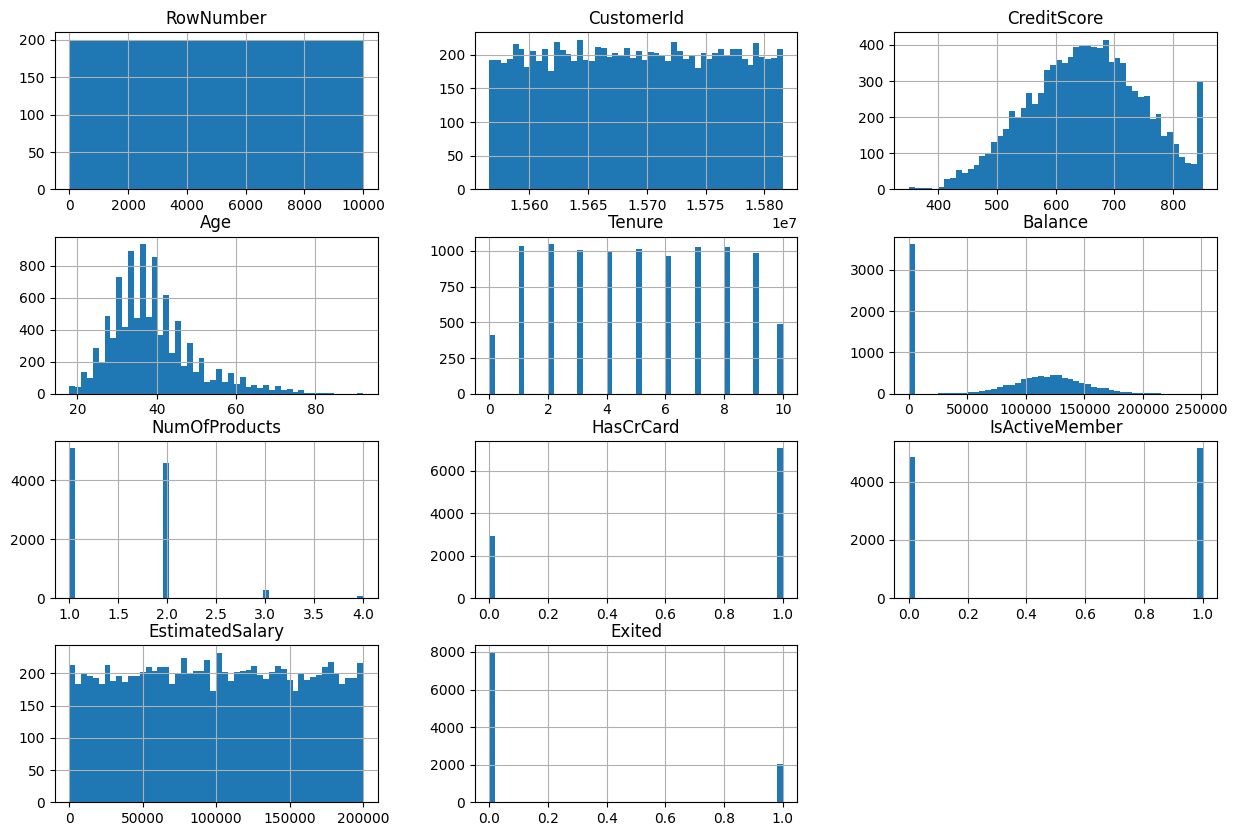

In [6]:
df.hist(bins=50,figsize=(15,10))

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Data Preprocessing**

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# **Encoding Categorical Columns**

In [15]:
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [16]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_1,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

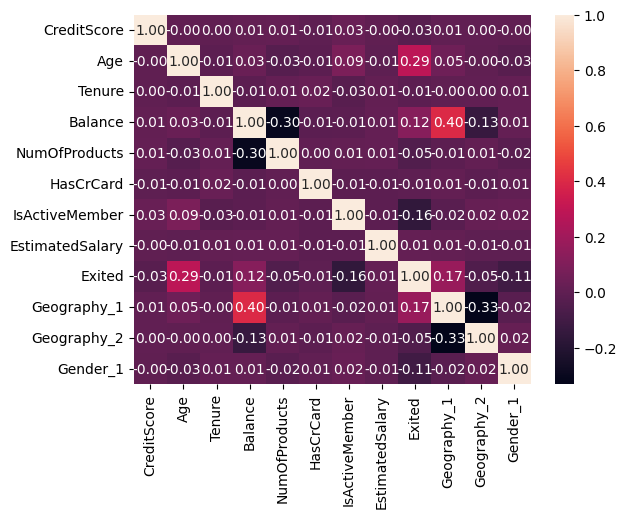

In [19]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [20]:
df.corr()['Exited'].sort_values(ascending=True)

IsActiveMember    -0.156128
Gender_1          -0.106512
Geography_2       -0.052667
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Geography_1        0.173488
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

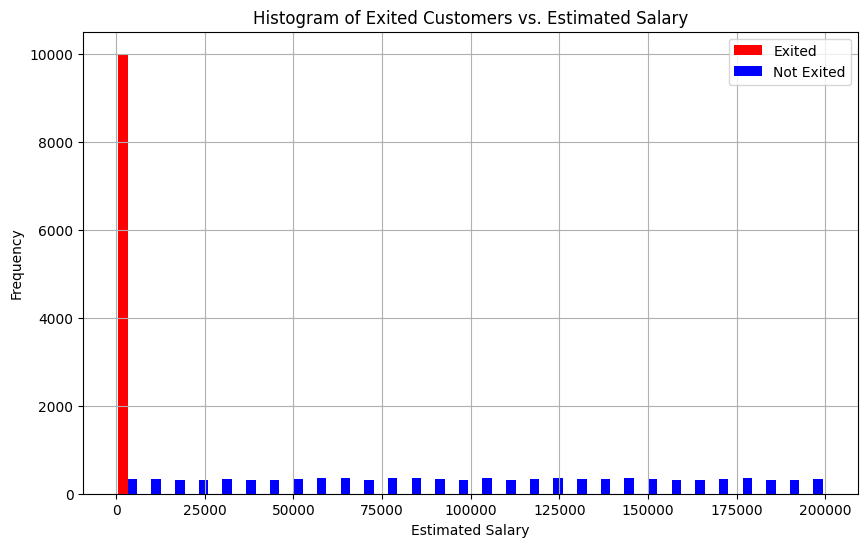

In [21]:
plt.figure(figsize=(10, 6))
plt.hist([df['Exited'], df['EstimatedSalary']], bins=30, color=['r', 'b'], label=['Exited', 'Not Exited'])
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Exited Customers vs. Estimated Salary')
plt.legend()
plt.grid(True)
plt.show()

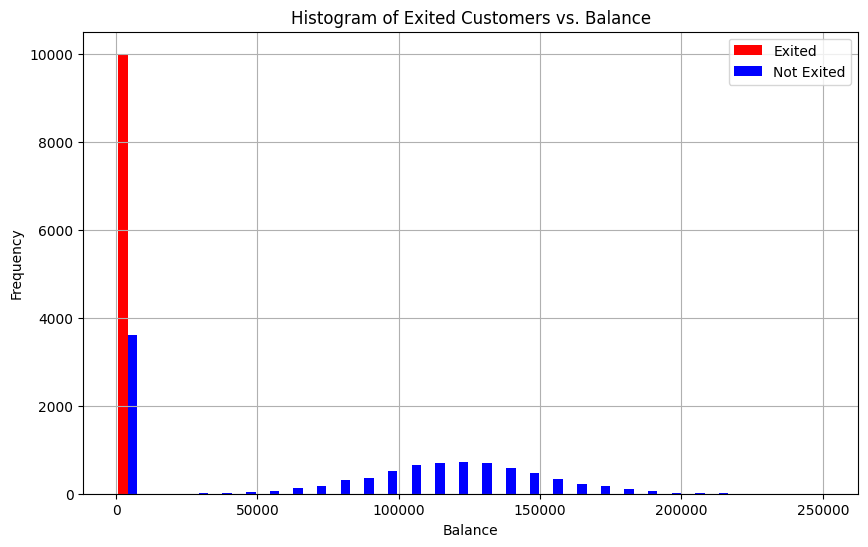

In [22]:
plt.figure(figsize=(10, 6))
plt.hist([df['Exited'], df['Balance']], bins=30, color=['r', 'b'], label=['Exited', 'Not Exited'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Exited Customers vs. Balance')
plt.legend()
plt.grid(True)
plt.show()

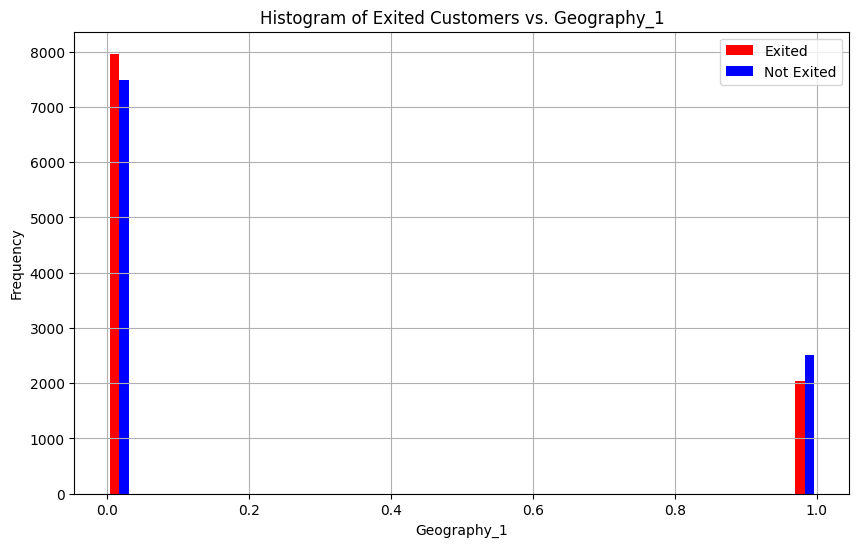

In [23]:
plt.figure(figsize=(10, 6))
plt.hist([df['Exited'], df['Geography_1']], bins=30, color=['r', 'b'], label=['Exited', 'Not Exited'])
plt.xlabel('Geography_1')
plt.ylabel('Frequency')
plt.title('Histogram of Exited Customers vs. Geography_1')
plt.legend()
plt.grid(True)
plt.show()

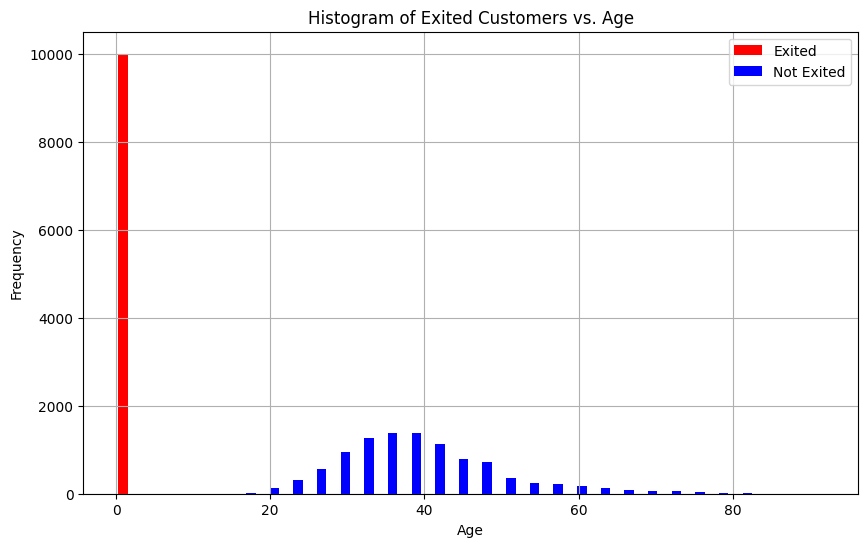

In [24]:
plt.figure(figsize=(10, 6))
plt.hist([df['Exited'], df['Age']], bins=30, color=['r', 'b'], label=['Exited', 'Not Exited'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Exited Customers vs. Age')
plt.legend()
plt.grid(True)
plt.show()

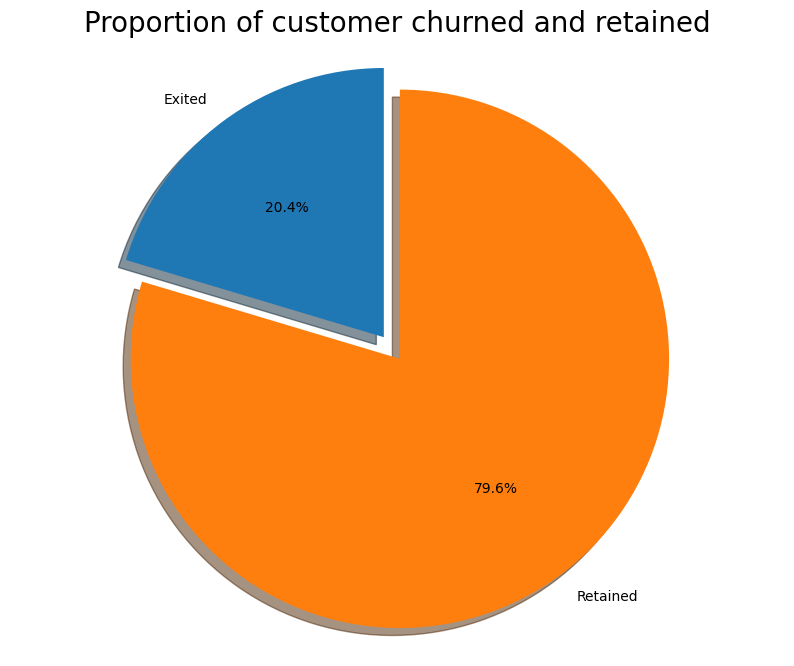

In [25]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [26]:
X=df.drop(columns='Exited',axis=1).values
y=df['Exited'].values

In [27]:
X

array([[619, 42, 2, ..., False, False, False],
       [608, 41, 1, ..., False, True, False],
       [502, 42, 8, ..., False, False, False],
       ...,
       [709, 36, 7, ..., False, False, False],
       [772, 42, 3, ..., True, False, True],
       [792, 28, 4, ..., False, False, False]], dtype=object)

In [28]:
y

array([1, 0, 1, ..., 1, 1, 0])

# **Standardizing the Features**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [30]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [31]:
X.shape

(10000, 11)

# **Splitting the dataset into the Training and Testing sets**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(8000, 11)

In [34]:
X_test.shape

(2000, 11)

# **Checking Accuracy Score, Confusion Matrix & ROC Curve using some common classifier algorithms**

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

## Logistic Regression

In [36]:
from sklearn.linear_model import  LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_pred=log_clf.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 81.10000000000001 %


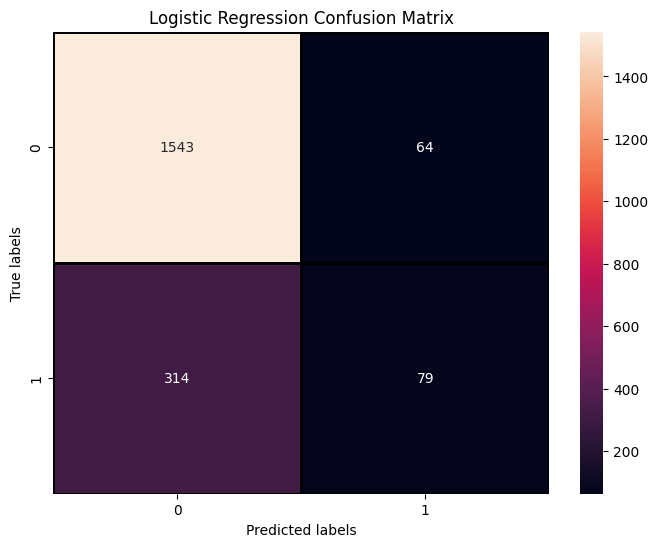

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt = "g",linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

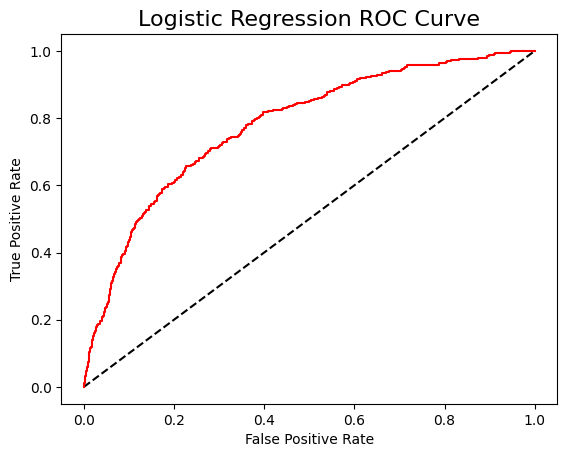

In [38]:
y_pred_prob = log_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

## SVM

In [39]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.6 %


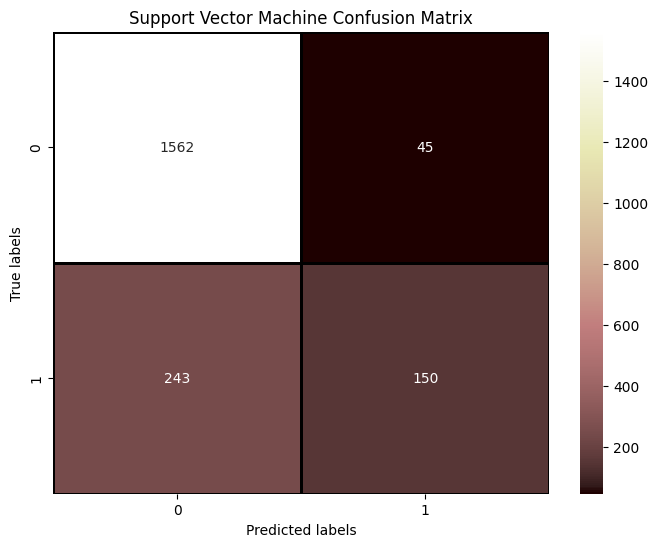

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='pink', fmt='g',linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

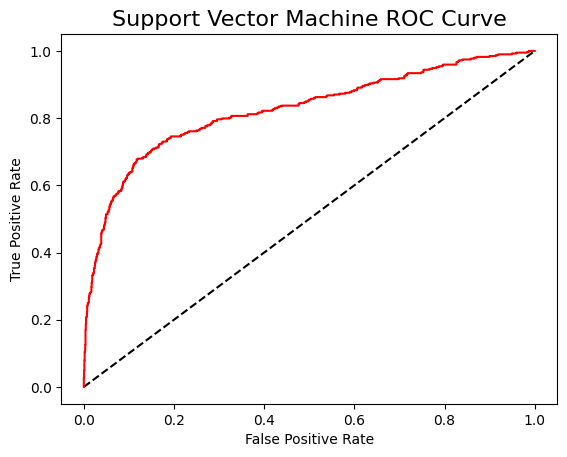

In [41]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
y_pred_prob = svm_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC Curve',fontsize=16)
plt.show()

## Dicision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 77.9 %


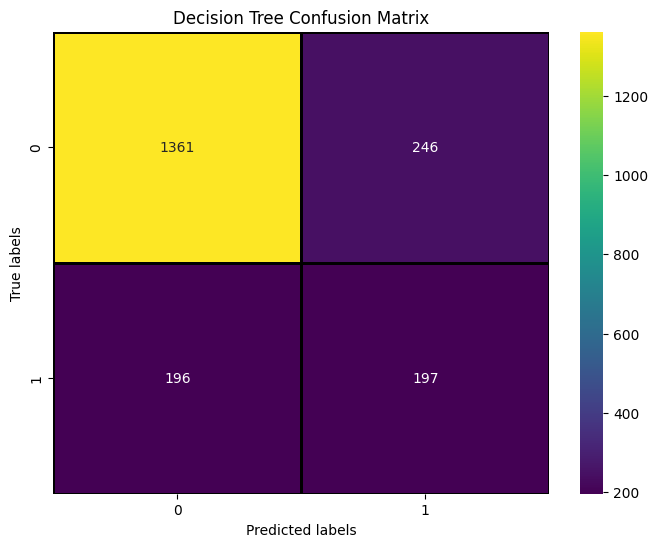

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

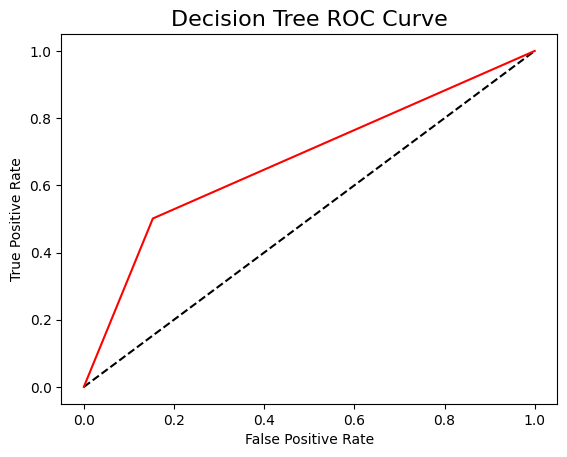

In [44]:
y_treepred_prob = tree_clf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_treepred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Decision Tree',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show()

## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.65 %


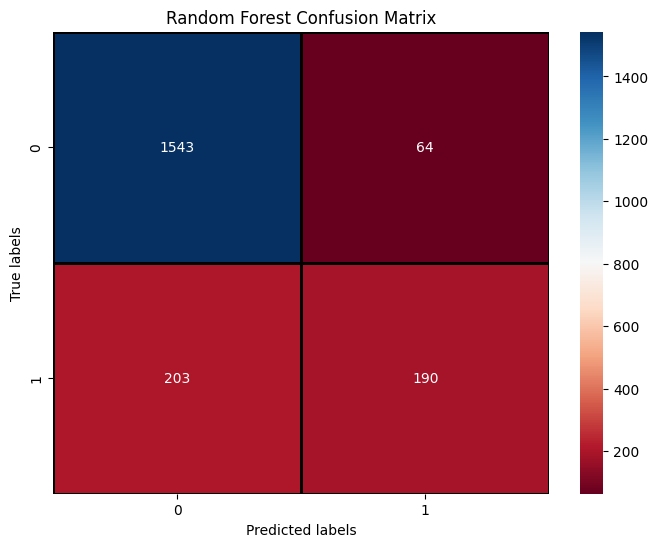

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='RdBu', fmt='g', linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

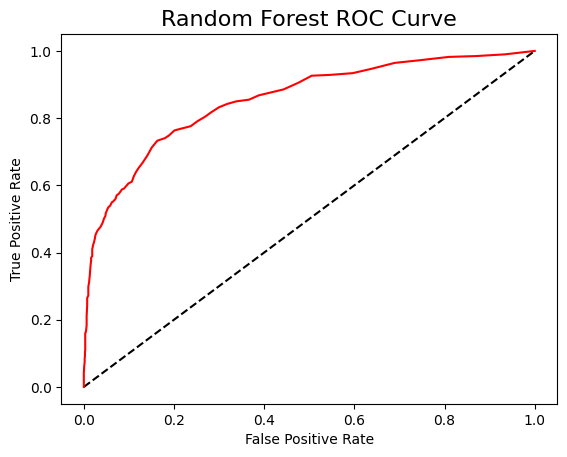

In [47]:
y_rfpred_prob = rnd_clf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

## XGBoost Classifier

In [48]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.4 %


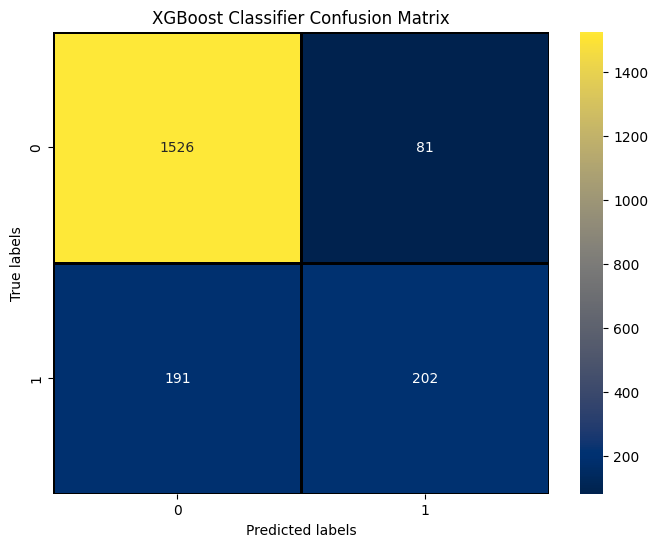

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='cividis', fmt='g', linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

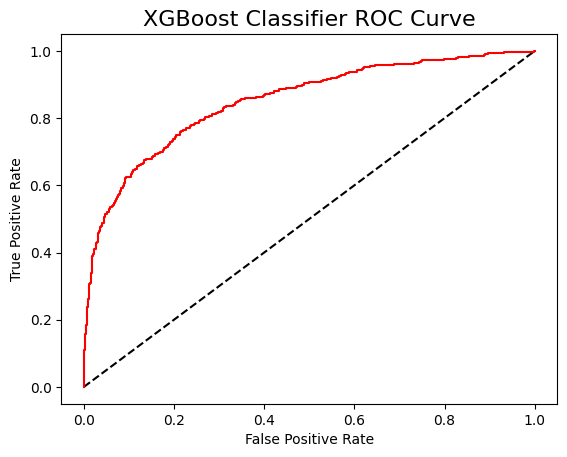

In [50]:
y_xgbpred_prob = xgb_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_xgbpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='XGBoost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve',fontsize=16)
plt.show()

## Neural Network

### Building the ANN model

In [51]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-04-14 15:29:22.020614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 15:29:22.020794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 15:29:22.197320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [52]:
model=Sequential([
    Dense(11, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(11, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the ANN model

In [54]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

### Training the ANN model

In [55]:
history=model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6904 - loss: 0.6011 - val_accuracy: 0.8037 - val_loss: 0.4721
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4912 - val_accuracy: 0.8125 - val_loss: 0.4299
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.4368 - val_accuracy: 0.8250 - val_loss: 0.3977
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8222 - loss: 0.4140 - val_accuracy: 0.8438 - val_loss: 0.3749
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3847 - val_accuracy: 0.8475 - val_loss: 0.3610
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3675 - val_accuracy: 0.8500 - val_loss: 0.3532
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8509 - loss: 0.3597 - val_accuracy: 0.8475 - val_loss: 0.3488
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8513 - loss: 0.3577 - val_accu

In [56]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
y_pred

array([[0.03236933],
       [0.02443546],
       [0.10067894],
       ...,
       [0.647664  ],
       [0.11582355],
       [0.30574068]], dtype=float32)

In [59]:
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

In [60]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [61]:
accuracy_score(y_test, y_pred_binary)

0.861

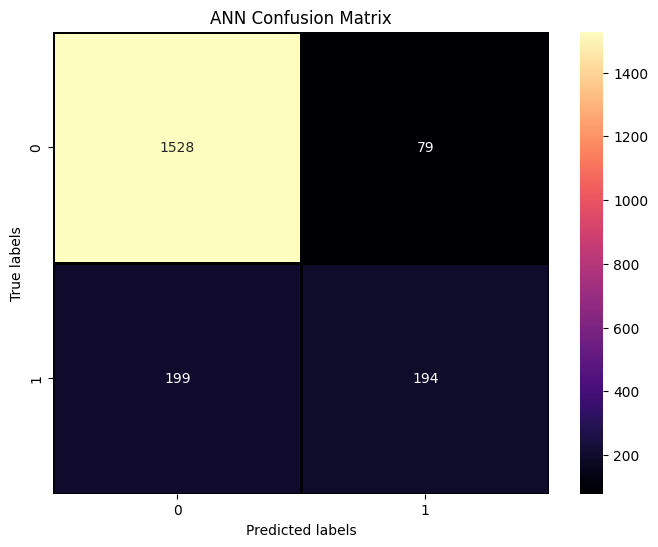

In [62]:
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='magma', fmt='g', linecolor="k",linewidths=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('ANN Confusion Matrix')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


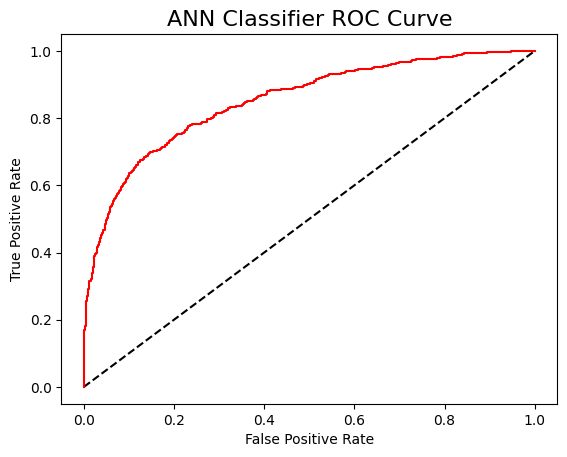

In [63]:
y_annpred_prob = model.predict(X_test)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_annpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='ANN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Classifier ROC Curve',fontsize=16)
plt.show()

### Evaluating the ANN model

In [64]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", round(test_loss*100,2), "%")
print("Test Accuracy:", round(test_accuracy*100,2), "%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3383
Test Loss: 34.19 %
Test Accuracy: 86.1 %


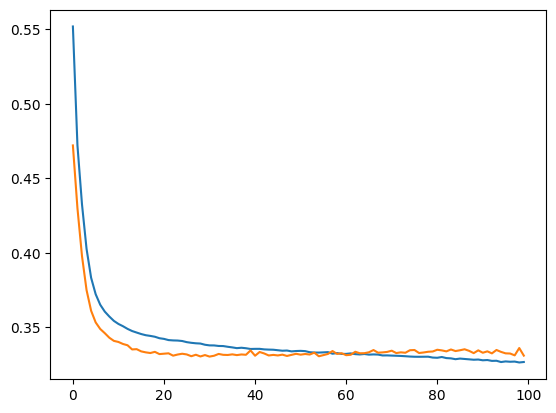

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

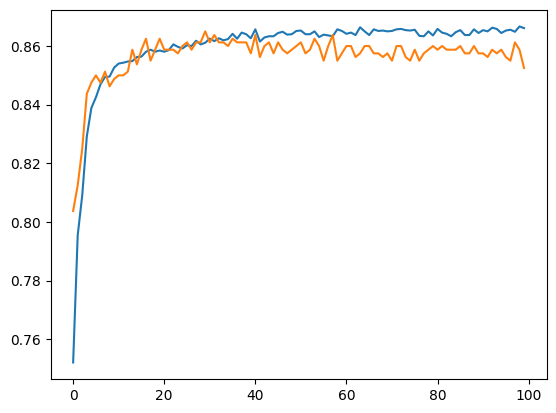

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])